In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 2s 0us/step


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
[max(sequence) for sequence in train_data]

[7486,
 9837,
 6905,
 9941,
 7224,
 7982,
 9363,
 9820,
 7612,
 8419,
 8914,
 7412,
 9667,
 9106,
 6640,
 9671,
 9263,
 9935,
 8742,
 9580,
 9859,
 8793,
 7609,
 9462,
 9075,
 8614,
 8887,
 5898,
 9637,
 9212,
 9771,
 9209,
 8257,
 7778,
 9877,
 9753,
 7015,
 9902,
 8427,
 8867,
 8406,
 9579,
 9529,
 7056,
 7023,
 9922,
 5811,
 9124,
 9910,
 8795,
 7799,
 7146,
 9978,
 7999,
 9565,
 9731,
 9095,
 9888,
 5247,
 9655,
 4852,
 9939,
 9018,
 9885,
 7239,
 9636,
 9389,
 9561,
 9673,
 9147,
 9956,
 9448,
 8520,
 9360,
 9765,
 9025,
 9928,
 8352,
 9960,
 7320,
 8318,
 7881,
 9715,
 9851,
 9266,
 9055,
 8894,
 9719,
 9271,
 7311,
 8791,
 9918,
 9486,
 9867,
 9283,
 7707,
 9133,
 9055,
 9978,
 8013,
 8448,
 8700,
 9906,
 7517,
 9962,
 6266,
 6903,
 9815,
 9976,
 9273,
 9413,
 8931,
 8631,
 9685,
 9419,
 9964,
 7361,
 9052,
 9482,
 9643,
 9865,
 9819,
 7181,
 2775,
 9709,
 9977,
 8916,
 4431,
 9700,
 6532,
 8836,
 9926,
 6781,
 7614,
 5418,
 8881,
 9841,
 9615,
 9072,
 9831,
 6891,
 8827,
 9019,

In [5]:
import numpy as np

In [15]:
test_data[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #Sets specific indices of results[i] to 1s
    return results

In [18]:
x_train = vectorize_sequences(train_data)

In [19]:
x_test = vectorize_sequences(test_data)

In [20]:
y_train = np.asarray(train_labels).astype('float32')

In [21]:
y_test = np.asarray(test_labels).astype('float32')

In [22]:
from keras import models

In [23]:
from keras import layers

In [24]:
model = models.Sequential()

In [25]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

In [26]:
model.add(layers.Dense(16, activation='relu'))

In [27]:
model.add(layers.Dense(1,activation='sigmoid'))

In [28]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [29]:
x_val = x_train[:10000]

In [33]:
partial_x_train=x_train[10000:]

In [31]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 722us/step - loss: 0.5251 - accuracy: 0.7811 - val_loss: 0.4189 - val_accuracy: 0.8346
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.3207 - accuracy: 0.9006 - val_loss: 0.3173 - val_accuracy: 0.8802
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2337 - accuracy: 0.9259 - val_loss: 0.2814 - val_accuracy: 0.8902
Epoch 4/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1836 - accuracy: 0.9409 - val_loss: 0.2815 - val_accuracy: 0.8873
Epoch 5/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1463 - accuracy: 0.9547 - val_loss: 0.2844 - val_accuracy: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1219 - accuracy: 0.9621 - val_loss: 0.2905 - val_accuracy: 0.8855
Epoch 7/20
15000/15000 [==============================] - 2s 

In [35]:
history_dict = history.history

In [36]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [38]:
import matplotlib.pyplot as plt

In [40]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [48]:
epochs = range(1, 21)

In [49]:
epochs

range(1, 21)

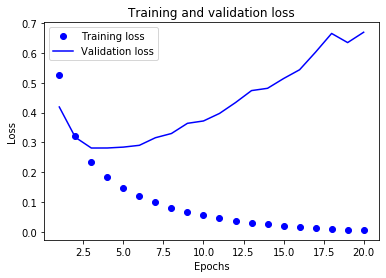

In [51]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#“bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
#“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 144us/step - loss: 1.2391e-05 - accuracy: 1.0000 - val_loss: 1.5367 - val_accuracy: 0.8549
Epoch 2/4
15000/15000 [==============================] - 2s 148us/step - loss: 9.7186e-06 - accuracy: 1.0000 - val_loss: 1.6048 - val_accuracy: 0.8548
Epoch 3/4
15000/15000 [==============================] - 2s 154us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.6503 - val_accuracy: 0.8550
Epoch 4/4
15000/15000 [==============================] - 2s 139us/step - loss: 7.0321e-06 - accuracy: 1.0000 - val_loss: 1.6356 - val_accuracy: 0.8551


In [56]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 145us/step


In [57]:
results

[1.7811196589940785, 0.8420400023460388]

In [58]:
results.keys()


AttributeError: 'list' object has no attribute 'keys'

In [59]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 5s 204us/step - loss: 0.5281 - accuracy: 0.9420
Epoch 2/4
25000/25000 [==============================] - 6s 245us/step - loss: 0.2202 - accuracy: 0.9523
Epoch 3/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.1485 - accuracy: 0.9609
Epoch 4/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.1171 - accuracy: 0.9676


In [60]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 117us/step


In [61]:
results

[0.5958170632266998, 0.847599983215332]